### Sigmoid Function

In [3]:
# Sigmoid Function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate Some Values
z = np.linspace(-10, 10, 100)
# print(z)
sigmoid_values = sigmoid(z)

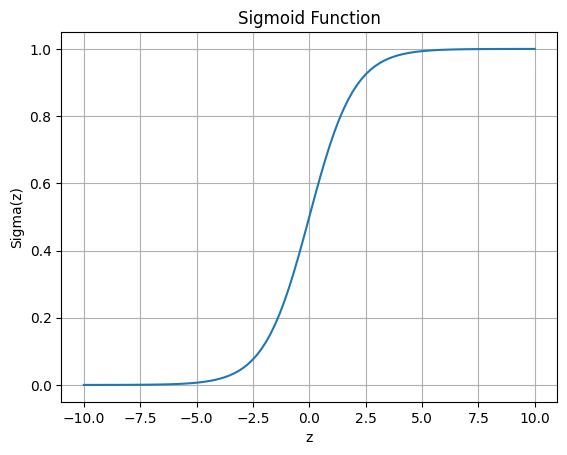

In [5]:
# Plot 
plt.plot(z, sigmoid_values)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigma(z)")
plt.grid()
plt.show()

### Logistic Regression

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

# Generate Synthetic Data
np.random.seed(42)
n_samples = 200
X = np.random.rand(n_samples, 2) * 10
y = (X[:, 0] * 1.5 + X[:, 1] > 15).astype(int)

# Creating a DataFrame
df = pd.DataFrame(X, columns=['Age', 'Salary'])
df['Purchase'] = y

# Data Head 
df.head(3)

,Age,Salary,Purchase
0,3.745401,9.507143,1
1,7.319939,5.986585,1
2,1.560186,1.559945,0


In [11]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(df[['Age','Salary']], df['Purchase'], test_size=0.2, random_state=42)

# Logistic Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Prediction
y_pred = model.predict(X_test)

In [12]:
# Evaluate Model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-Score:  1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [16]:
# PLot Decision Boundary
x_min, x_max = df["Age"].min() - 1, df["Age"].max() + 1
y_min, y_max = df["Salary"].min() - 1, df["Salary"].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


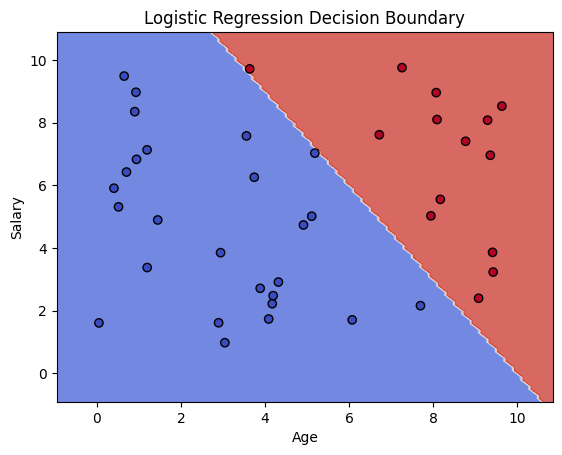

In [19]:
# Predict Probabilities for Grid Point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_test['Age'], X_test['Salary'], c=y_test, edgecolor="k", cmap="coolwarm")
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()